In [2]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

features = [
    'danceability',
    'energy',
    #'key',
    'loudness',
    #'mode',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    #'duration_ms',
    #'time_signature'
]

In [3]:
#Pandas reads the dataframe from the directory or path
df = pd.read_csv ('/home/asmaosman/Downloads/Features files/features_final.csv',  index_col = 0)  #index_col tells pandas to read the first column as an index


In [4]:
#convert the dataframe to numpy array
data = df[features].to_numpy()
data.shape

(674, 8)

In [5]:
data

array([[ 3.17000e-01,  3.86000e-01, -1.30660e+01, ...,  1.63000e-01,
         7.82000e-01,  1.00796e+02],
       [ 5.27000e-01,  4.44000e-01, -1.37080e+01, ...,  4.14000e-01,
         7.25000e-01,  1.24681e+02],
       [ 4.94000e-01,  1.70000e-01, -2.09790e+01, ...,  8.75000e-02,
         3.14000e-01,  1.55024e+02],
       ...,
       [ 5.75000e-01,  2.69000e-01, -2.28350e+01, ...,  5.74000e-01,
         7.61000e-01,  1.10744e+02],
       [ 6.73000e-01,  6.76000e-01, -8.82700e+00, ...,  1.61000e-01,
         5.39000e-01,  1.52338e+02],
       [ 6.53000e-01,  8.64000e-01, -3.36200e+00, ...,  8.14000e-02,
         8.45000e-01,  1.58393e+02]])

In [6]:
#Normalize all the data to 0 mean and 1 standard deviation
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:, 0].std()

1.0

In [7]:
data

array([[-1.68296467, -0.83894505, -0.45942735, ..., -0.4062235 ,
        -0.01359585, -0.87489085],
       [-0.26166597, -0.55671059, -0.56813956, ...,  0.73873283,
        -0.37481683, -0.09380507],
       [-0.48501291, -1.89002513, -1.79936463, ..., -0.75062271,
        -2.97941017,  0.89846982],
       ...,
       [ 0.0632023 , -1.4082801 , -2.1136479 , ...,  1.46858546,
        -0.14667727, -0.54957197],
       [ 0.72647503,  0.57222727,  0.25837805, ..., -0.41534665,
        -1.5535379 ,  0.81063241],
       [ 0.59111325,  1.48705623,  1.18378651, ..., -0.77844834,
         0.38564838,  1.00864264]])

In [9]:
#save the numpy array for further use
np.save('/home/asmaosman/Downloads/Features files/training_data.npy', data)

In [10]:
pca = PCA(n_components = 2)
res_pca = pca.fit_transform(data)

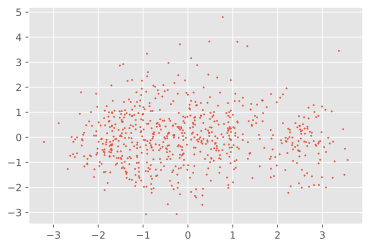

In [11]:
#apply a simple scatter plot to see whats going on with the data at this stage
plt.scatter(res_pca[:,0], res_pca[:,1], s=2, alpha = 0.9)

In [12]:
fig, axes = plt.subplots(2,4, figsize=(9,5))

for feature, ax in zip (features, axes.ravel()):
    cmap ='inferno'
    sizes= 20+5*data[:, features.index(feature)]
    cols=df[feature]
    
    ax.scatter(res_pca[:,0], res_pca[:,1], s=sizes,c=cols, cmap=cmap)
    ax.set_title(feature)
plt.tight_layout()